# Removing outliers - outlier trimming

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

In this notebook, we will remove observations that are beyond certain limits.

We we calculate those limits using:

- The IQR proximity rule
- The normal distribution
- The quantiles

<font color="green"># omd</font>  
Identifying outliers can be approached using various methods, including the Interquartile Range (IQR) proximity rule, the assumption of a normal distribution, and quantiles. Let's discuss each method and then demonstrate how to implement them in Python:

1. **Interquartile Range (IQR) Proximity Rule**:
   - The IQR is a measure of statistical dispersion, representing the range between the first quartile (25th percentile) and the third quartile (75th percentile) of a dataset.
   - Outliers are often defined as observations that fall below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR.
   - This method is robust to non-normality and is particularly effective for skewed distributions.

2. **Normal Distribution**:
   - Assuming a normal distribution, outliers are typically defined as observations that fall more than a certain number of standard deviations away from the mean.
   - A common threshold is to consider observations more than 2 or 3 standard deviations away from the mean as outliers.
   - This method may not be suitable for datasets with non-normal distributions.

3. **Quantiles**:
   - Quantiles divide a dataset into equal-sized intervals, such as quartiles (dividing the data into four equal parts), deciles (dividing the data into ten equal parts), or percentiles (dividing the data into 100 equal parts).
   - Outliers can be defined as observations falling below or above certain quantiles, such as the first or third quartiles.
   - This method allows for flexibility in defining outliers based on the desired quantile thresholds.

The preferred method for identifying outliers depends on the characteristics of the dataset and the underlying distribution. In practice, it is often recommended to use multiple methods and compare the results to gain a more comprehensive understanding of outliers.

Now, let's demonstrate how to identify outliers using each method in Python:

```python
import numpy as np
from scipy.stats import zscore

# Generate a sample dataset
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Method 1: Interquartile Range (IQR) Proximity Rule
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

# Method 2: Normal Distribution (Z-Score)
threshold_zscore = 3  # Consider observations more than 3 standard deviations away from the mean as outliers
z_scores = zscore(data)
outliers_zscore = data[np.abs(z_scores) > threshold_zscore]

# Method 3: Quantiles (First and Third Quartiles)
threshold_quantile = 0.05  # Consider observations below the 5th percentile or above the 95th percentile as outliers
lower_quantile = np.percentile(data, 100 * threshold_quantile)
upper_quantile = np.percentile(data, 100 * (1 - threshold_quantile))
outliers_quantile = data[(data < lower_quantile) | (data > upper_quantile)]

# Print the number of outliers detected by each method
print("Number of outliers detected by IQR proximity rule:", len(outliers_iqr))
print("Number of outliers detected by Z-Score method:", len(outliers_zscore))
print("Number of outliers detected by quantile method:", len(outliers_quantile))
```

In this example:
- We generate a sample dataset of 1000 observations from a normal distribution.
- We use each method to identify outliers based on different criteria: IQR proximity rule, Z-Score (normal distribution assumption), and quantiles (first and third quartiles).
- We print the number of outliers detected by each method.

You can adjust the thresholds and parameters for each method according to your specific requirements and dataset characteristics. It's also a good practice to visualize the data and the identified outliers to gain a better understanding of their distribution and impact on the analysis.

Number of outliers detected by IQR proximity rule: 8
Number of outliers detected by Z-Score method: 1
Number of outliers detected by quantile method: 100



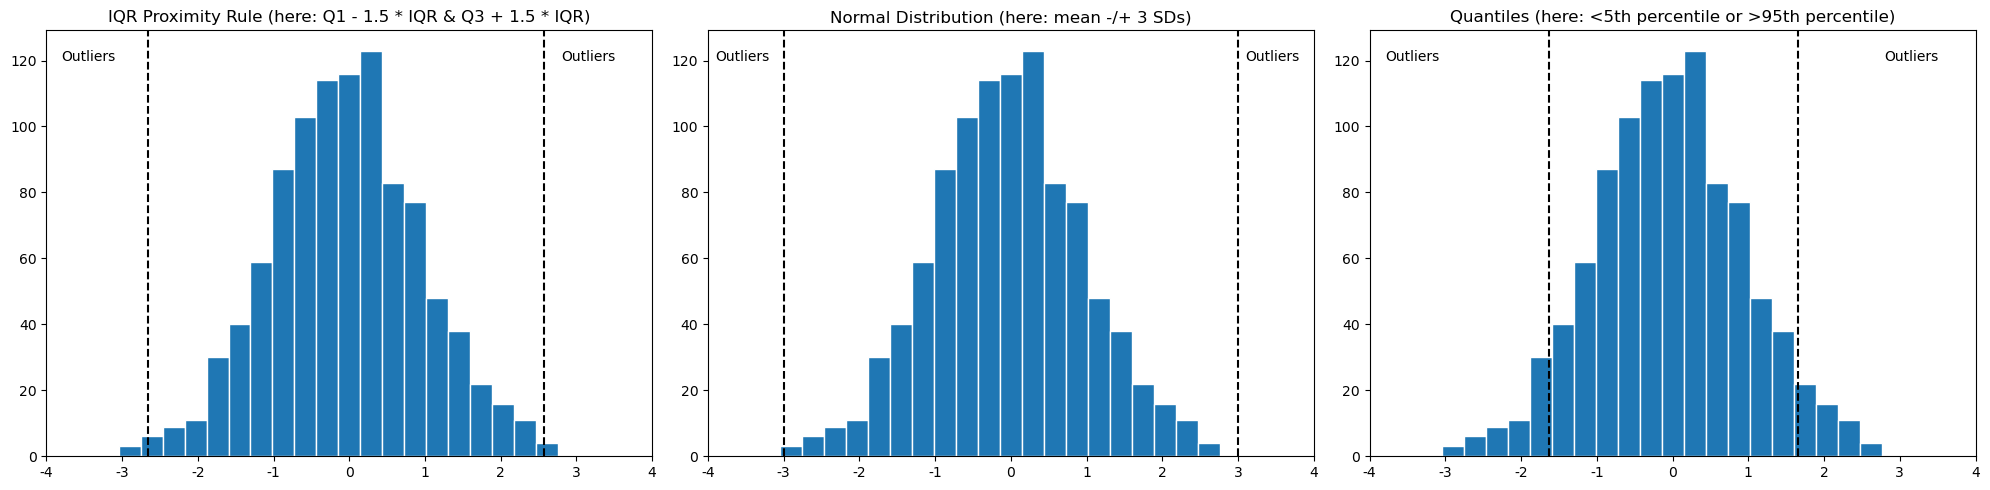

In [44]:
# omd 
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Method 1: Interquartile Range (IQR) Proximity Rule
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

# Method 2: Normal Distribution (Z-Score)
threshold_zscore = 3  # Consider observations more than 3 standard deviations away from the mean as outliers
z_scores = zscore(data)
outliers_zscore = data[np.abs(z_scores) > threshold_zscore]

# Method 3: Quantiles (First and Third Quartiles)
threshold_quantile = 0.05  # Consider observations below the 5th percentile or above the 95th percentile as outliers
lower_quantile = np.percentile(data, 100 * threshold_quantile)
upper_quantile = np.percentile(data, 100 * (1 - threshold_quantile))
outliers_quantile = data[(data < lower_quantile) | (data > upper_quantile)]

# Print the number of outliers detected by each method
print("Number of outliers detected by IQR proximity rule:", len(outliers_iqr))
print("Number of outliers detected by Z-Score method:", len(outliers_zscore))
print("Number of outliers detected by quantile method:", len(outliers_quantile))
print()

plt.figure(figsize=(20,5))

# Method 1: Interquartile Range (IQR) Proximity Rule
plt.subplot(1,3,1)
plt.hist(data, bins=20, ec='white')
plt.title('IQR Proximity Rule (here: Q1 - 1.5 * IQR & Q3 + 1.5 * IQR)')
plt.xticks(np.arange(-4, 5, 1), np.arange(-4, 5, 1))
plt.axvline(x=lower_bound, color='black', ls='--')
plt.axvline(x=upper_bound, color='black', ls='--')
plt.text(x=-3.8, y=120, s='Outliers')
plt.text(x=2.8, y=120, s='Outliers')

# Method 2: Normal Distribution
plt.subplot(1,3,2)
plt.hist(data, bins=20, ec='white')
plt.title('Normal Distribution (here: mean -/+ 3 SDs)')
plt.xticks(np.arange(-4, 5, 1), np.arange(-4, 5, 1))
plt.axvline(x=-threshold_zscore, color='black', ls='--')
plt.axvline(x=threshold_zscore, color='black', ls='--')
plt.text(x=-3.9, y=120, s='Outliers')
plt.text(x=3.1, y=120, s='Outliers')

# Method 3: Quantiles
plt.subplot(1,3,3)
plt.hist(data, bins=20, ec='white')
plt.title('Quantiles (here: <5th percentile or >95th percentile)')
plt.xticks(np.arange(-4, 5, 1), np.arange(-4, 5, 1))
plt.axvline(x=lower_quantile, color='black', ls='--')
plt.axvline(x=upper_quantile, color='black', ls='--')
plt.text(x=-3.8, y=120, s='Outliers')
plt.text(x=2.8, y=120, s='Outliers')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [3]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [4]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

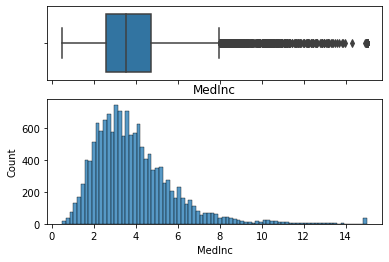

In [5]:
plot_boxplot_and_hist(X_train, "MedInc")

## IQR

In [6]:
def find_limits(df, variable, fold):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit, upper_limit

In [7]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-3.925900000000002, 11.232600000000001)

In [8]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [9]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [10]:
X_train.shape, X_test.shape

((14348, 8), (6151, 8))

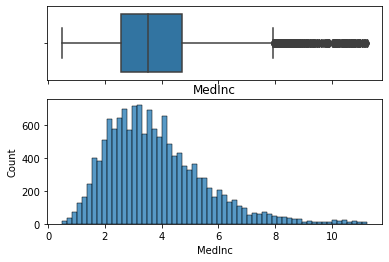

In [11]:
plot_boxplot_and_hist(X_train, "MedInc")

The moment we remove outliers, all the statistical parameters of the distribution change, and we could again see outliers. Hence, removing real outliers is not so straightforward.

## Normal distribution

In [12]:
def find_limits(df, variable, fold):

    lower_limit = df[variable].mean() - (df[variable].std() * fold)
    upper_limit = df[variable].mean() + (df[variable].std() * fold)

    return lower_limit, upper_limit

The rest of the procedure is identical.

In [13]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [14]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-1.8068060061060955, 9.540140820613294)

In [15]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [16]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [17]:
X_train.shape, X_test.shape

((14211, 8), (6082, 8))

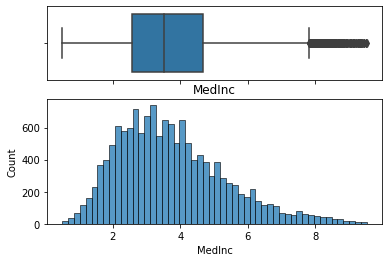

In [18]:
plot_boxplot_and_hist(X_train, "MedInc")

## Quantiles

In [19]:
def find_limits(df, variable):
    lower_limit = X_train[variable].quantile(0.05)
    upper_limit = X_train[variable].quantile(0.95)
    return lower_limit, upper_limit

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [21]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc")
lower_limit, upper_limit

(1.60152, 7.284699999999999)

In [22]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [23]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [24]:
X_train.shape, X_test.shape

((13002, 8), (5557, 8))

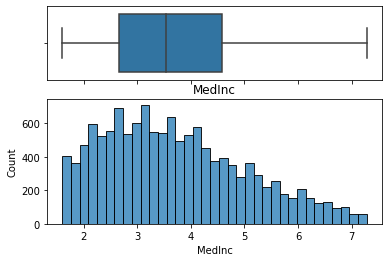

In [25]:
plot_boxplot_and_hist(X_train, "MedInc")